# Comparison Example
bias=CF_Res-CF_BMK

Maximum absolute bias:0.0000
Minimum absolute bias:0.0000


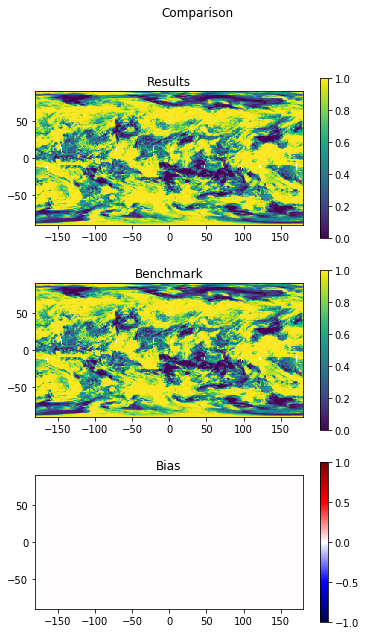

In [5]:
from comparisons import readData, doPlot
#Single day benchmark results
benchmark_p="/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MODAgg_3var_parMonth/"
comparisonP="/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MODAgg_3var_parMonth/"
CF_BMK,_,_=readData(benchmark_p+"MODAgg_3var_parMonth_20080101.hdf5")#Benchmark
CF_Res,_,_=readData(comparisonP+"MODAgg_3var_parMonth_20080101.hdf5")#Results for the comparison
fig1,fig1_ttl=doPlot(CF_Res,CF_BMK,'Comparison')

# Redwan's results

Maximum absolute bias:0.9383
Minimum absolute bias:0.0000


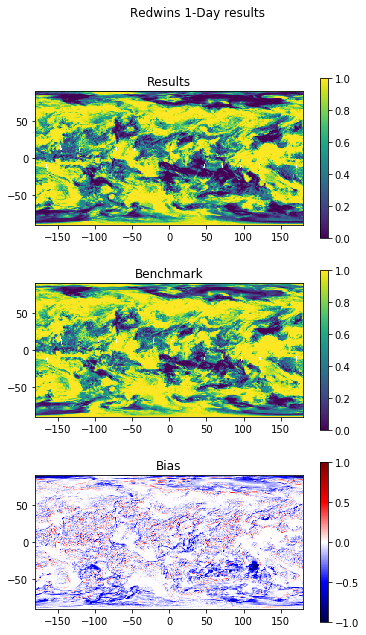

In [6]:
benchmark_p="/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MODAgg_3var_parMonth/"
CF_BMK,_,_=readData(benchmark_p+"MODAgg_3var_parMonth_20080101.hdf5")#Benchmark
#Redwan's results (He does not use save_hdf() to save output files.)
from netCDF4 import Dataset
f = Dataset("/umbc/xfs1/jianwu/users/rwalid1/individual/work/Cybtrn-team3/Jan_CF_XR_L2L3_Jun19_n4_run1_1day.nc", "r")
CF_Res=f.variables['__xarray_dataarray_variable__'][:]
f.close()
fig1,fig1_ttl=doPlot(CF_Res,CF_BMK,'Redwins 1-Day results')

# Comparing sub-sampling tests (Savio's)


## Bias plot
Bias=RES-BMK

Maximum absolute bias:0.1017
Minimum absolute bias:0.0000


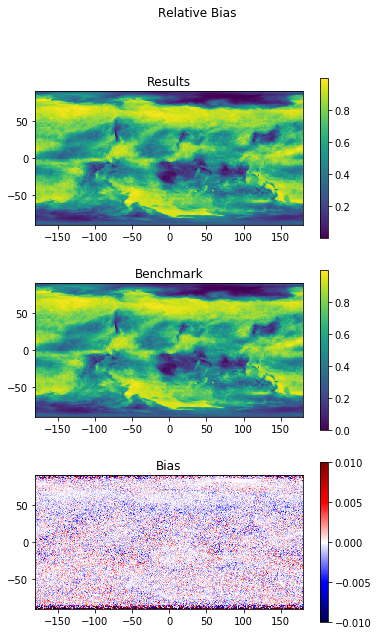

In [7]:
import h5py
f=h5py.File('/umbc/xfs1/jianwu/common/MODIS_Aggregation/savioexe/test/4/foursub4n_onemonth.hdf','r')
BMK=f['__xarray_dataarray_variable__'][:]
f.close()
f=h5py.File('/umbc/xfs1/jianwu/common/MODIS_Aggregation/savioexe/test/4/nosub4n_onemonth.hdf','r')
RES=f['__xarray_dataarray_variable__'][:]
f.close()
bias=CF1-CF2
fig1,fig1_ttl=doPlot(RES,BMK,'Relative Bias',vmin=-0.01,vmax=0.01)

## Relative bias
Relative bias = (RES-BMK)/BMK

Maximum absolute bias:inf
Minimum absolute bias:0.0000


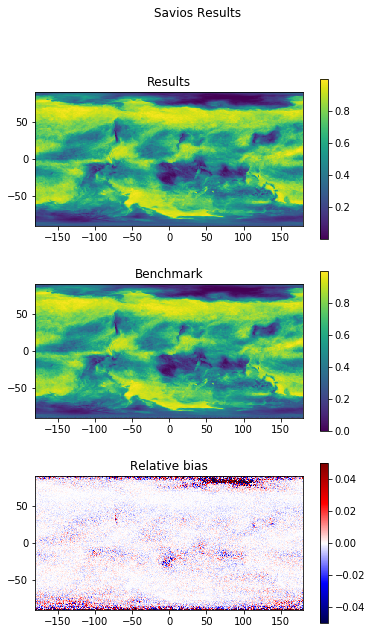

In [10]:
fig1,fig1_ttl=doPlot(RES,BMK,'Savios Results',vmin=-0.05,vmax=0.05,bty='relative')

## Comparing benchmark code with the actual level3 data

In [1]:
import h5py
from comparisons import doPlot
from MODIS_Aggregation_base import MODIS_level3
f=h5py.File('MOD08_D3A2008001.2Vars.hdf5','r')
for key in f.keys():
    print(key+' : '+f[key].attrs['long_name']+' , '+f[key].attrs['units'])
res_CF_mean=f['CF'][:]
res_lt=f['lat_bnd'][:]
res_ln=f['lon_bnd'][:]
f.close()
ML3=MODIS_level3('MOD08_D3A2008001.2Vars.hdf5')
res_CTP_mean=ML3.get_stat('CTP','mean')
res_CTT_mean=ML3.get_stat('CTT','mean')

CF : Cloud_Fraction , Fraction
CTP_max : cloud_top_pressure_1km_Maximum , hPa
CTP_mean : cloud_top_pressure_1km_Mean , hPa
CTP_min : cloud_top_pressure_1km_Minimum , hPa
CTP_stdd : cloud_top_pressure_1km_Standard_Deviation , hPa
CTT_max : cloud_top_temperature_1km_Maximum , K
CTT_mean : cloud_top_temperature_1km_Mean , K
CTT_min : cloud_top_temperature_1km_Minimum , K
CTT_stdd : cloud_top_temperature_1km_Standard_Deviation , K
PC : Pixel_Count , Count
lat_bnd : Latitude_boundaries , degrees
lon_bnd : Longitude_boundaries , degrees


In [2]:
import netCDF4
import numpy as np
fo_path='/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MYD08_D3_original/'
data=netCDF4.Dataset(fo_path+'MYD08_D3.A2008001.061.2018031095350.hdf','r')
bmk_CF_mean=np.squeeze(data.variables['Cloud_Fraction_Mean'][:])
bmk_CTP_mean=data.variables['Cloud_Top_Pressure_Mean'][:]
bmk_CTT_mean=data.variables['Cloud_Top_Temperature_Mean'][:]
bmk_lt=data.variables['YDim'][:]
bmk_ln=data.variables['XDim'][:]
data.close()
bmk_lt
#fo=h5py.File(fo_path+'MYD08_D3.A2008001.061.2018031095350.hdf','r')


masked_array(data=[ 89.5,  88.5,  87.5,  86.5,  85.5,  84.5,  83.5,  82.5,
                    81.5,  80.5,  79.5,  78.5,  77.5,  76.5,  75.5,  74.5,
                    73.5,  72.5,  71.5,  70.5,  69.5,  68.5,  67.5,  66.5,
                    65.5,  64.5,  63.5,  62.5,  61.5,  60.5,  59.5,  58.5,
                    57.5,  56.5,  55.5,  54.5,  53.5,  52.5,  51.5,  50.5,
                    49.5,  48.5,  47.5,  46.5,  45.5,  44.5,  43.5,  42.5,
                    41.5,  40.5,  39.5,  38.5,  37.5,  36.5,  35.5,  34.5,
                    33.5,  32.5,  31.5,  30.5,  29.5,  28.5,  27.5,  26.5,
                    25.5,  24.5,  23.5,  22.5,  21.5,  20.5,  19.5,  18.5,
                    17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
                     9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,
                     1.5,   0.5,  -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,
                    -6.5,  -7.5,  -8.5,  -9.5, -10.5, -11.5, -12.5, -13.5,
                   -14.5,

Maximum absolute bias:0.9094
Minimum absolute bias:0.0000


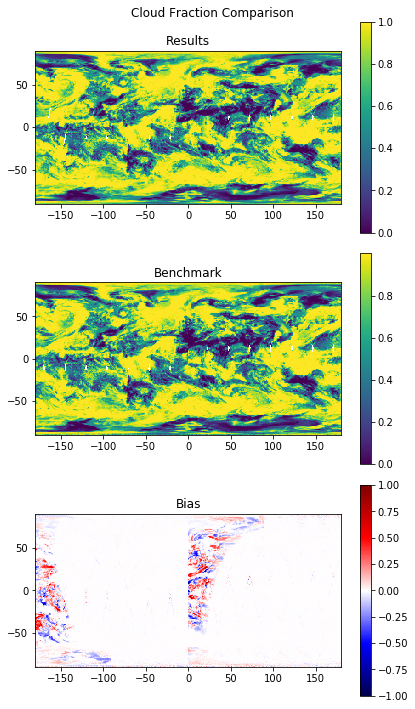

In [3]:
fig1,fig1_ttl=doPlot(np.flip(res_CF_mean,0),bmk_CF_mean,'Cloud Fraction Comparison')
fig1.tight_layout(rect=[0,0,1,0.98])

Maximum absolute bias:9944.4447
Minimum absolute bias:0.1623


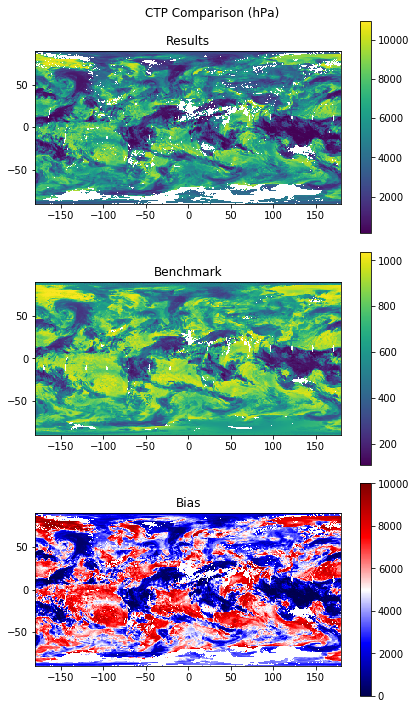

In [4]:
fig1,fig1_ttl=doPlot(np.flip(res_CTP_mean,0),bmk_CTP_mean,'CTP Comparison (hPa)',vmin=0,vmax=10000)
fig1.tight_layout(rect=[0,0,1,0.98])

Maximum absolute bias:9944.4447
Minimum absolute bias:0.1623


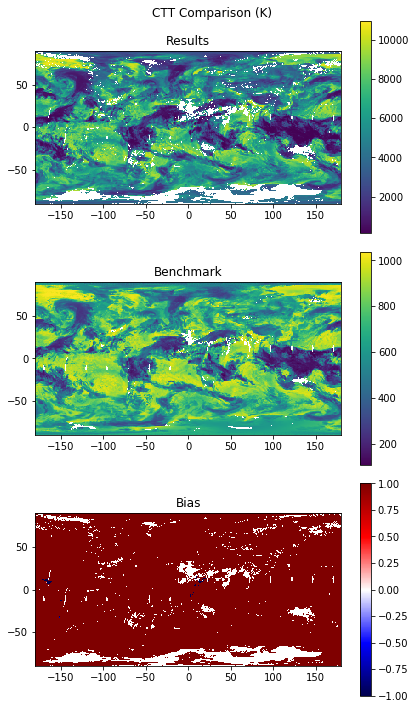

In [5]:
fig1,fig1_ttl=doPlot(np.flip(res_CTP_mean,0),bmk_CTP_mean,'CTT Comparison (K)')
fig1.tight_layout(rect=[0,0,1,0.98])

In [94]:
from MODIS_Aggregation_base import MODIS_Level2
MD=MODIS_Level2({'CTP':('cloud_top_pressure_1km','hPa'),'CTT':('cloud_top_temperature_1km','K')})

In [97]:
latt,lonn,ddd=MD.readHDF('/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/input-data/MYD03/MYD03.A2008001.0000.006.2012066122450.hdf',\
           '/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/input-data/MYD06/MYD06_L2.A2008001.0000.006.2013341193524.hdf')

In [96]:
MD.var


{'CTP': ('cloud_top_pressure_1km', 'hPa'),
 'CTT': ('cloud_top_temperature_1km', 'K')}

In [98]:
latt

array([[69.99062 , 69.99425 , 69.99774 , ..., 62.61897 , 62.58984 ,
        62.560364],
       [69.97248 , 69.97615 , 69.9797  , ..., 62.605747, 62.57684 ,
        62.54706 ],
       [69.95433 , 69.95805 , 69.961655, ..., 62.592495, 62.563313,
        62.533596],
       ...,
       [52.11962 , 52.11983 , 52.119995, ..., 47.52033 , 47.50235 ,
        47.484215],
       [52.101448, 52.101715, 52.101936, ..., 47.503967, 47.48593 ,
        47.46775 ],
       [52.083275, 52.0836  , 52.083874, ..., 47.48759 , 47.469513,
        47.45127 ]], dtype=float32)

In [14]:
data={'key1':1,'ket2':2}
data.update({'CF':1,'PC':2})
print(data)

{'key1': 1, 'ket2': 2, 'CF': 1, 'PC': 2}


In [15]:
data.update({})

In [16]:
data

{'key1': 1, 'ket2': 2, 'CF': 1, 'PC': 2}

In [17]:
'key1' in data

True

In [18]:
del data['key1']

In [19]:
data

{'ket2': 2, 'CF': 1, 'PC': 2}

# Deepak's results

Maximum absolute bias:1.0000
Minimum absolute bias:0.0000


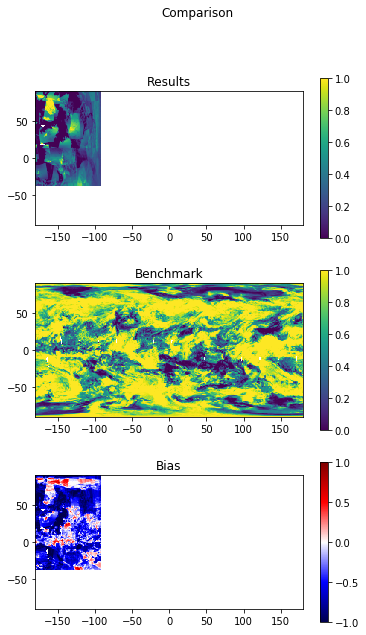

In [11]:
import h5py
import numpy as np
from comparisons import readData, doPlot
benchmark_p="/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MODAgg_3var_parMonth/"
CF_BMK,_,_=readData(benchmark_p+"MODAgg_3var_parMonth_20080101.hdf5")#Benchmark

f=h5py.File('/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/pandas_output.hdf5','r')
CF_res=f['CF'][:]
fig1,fig1_ttl=doPlot(CF_res,CF_BMK,'Comparison')

In [12]:
np.shape(CF_res)

(180, 360)

In [13]:
np.shape(CF_BMK)

(180, 360)